In [5]:
%matplotlib inline

Here it is a mathematical definition of the leaky echo-state network

### Leaky Echo-State
The dynamical system is a recurrent network of leaky units:

$$
\begin{eqnarray}
\tau\dot{\mathbf{x}} = -\mathbf{x} + \mathbf{W}\tanh\left(\mathbf{x}\right)
&&\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ &&
\mathbf{x} \in \mathbb{R}^N,  \mathbf{W} \in \mathbb{R}^{N\times N}
\end{eqnarray}
$$

The only constraint defining echo-state networks compared to other recurrent networks is as follows:
$$
\begin{eqnarray}
\mathbf{Wd} = \frac{\delta t}{\tau}\mathbf{W} + \left(1 - \frac{\delta t}{\tau}\right)I\\
1-\epsilon <  \rho\left(\mathbf{Wd}\right)  < 1
&&\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ &&
\rho\left(M\right) = \max_i\left( \lambda_i \right)
\end{eqnarray}
$$

### Finding $\mathbf{W}$

Given the constraint above, we can find the weights with few steps:

1. **Init** $\mathbf{WD}$ from $\mathcal{N}\left(0,1\right)$
    1. **Decompose** $\mathbf{Wd}$ $\ \ \ \ \ \ \rightarrow\ \ \ \ \ \ \ $ $\mathbf{Wd^+} = \frac{\mathbf{Wd}+\mathbf{Wd}^T}{2}\ \ \ $ and $\ \ \ \mathbf{Wd^{-}} = \frac{\mathbf{Wd}-\mathbf{Wd}^T}{2}$
    * **Recompose** $\mathbf{Wd}$ $\ \ \ \ \ \ \rightarrow\ \ \ \ \ \ \ $ $[\alpha\mathbf{Wd^{-}}$ + $(1-\alpha)\mathbf{Wd^{+}}]$
* **Estract** $\mathbf{W}$ from  $\mathbf{Wd}$ $\ \ \rightarrow\ \ \ \ \ \ \ $ 
$\mathbf{W} = \frac{\tau}{\delta t}\left(\mathbf{Wd} - \left(1 - \frac{\delta t}{\tau}\right)I  \right)$

Steps 1A and 1B are my "dynamic-rotation" trick. They are not part of the original algorithm

### The values of $\alpha$

The function demo in the script [dynrot.py](dynrot.py) simulates the activation of an ESN due to a sparse input with different values of $\alpha$. The greater is $\alpha$, the greater is the variance of the real part of the eigenvalues of $\mathbf{W}$. Inversely, the variance of the imaginary part of the eigenvalues of $\mathbf{W}$ decreases as $\alpha$ increases

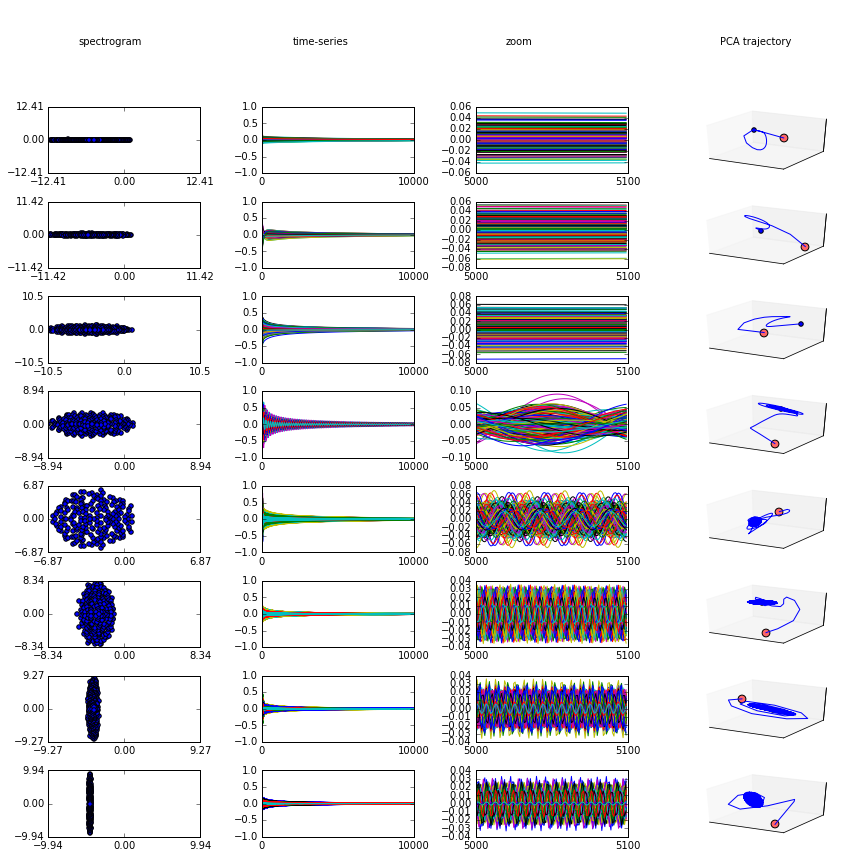

In [6]:
import  dynrot 
dynrot.demo()